In [1]:

import astropy
import matplotlib
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from matplotlib.colors import LogNorm
from astropy.wcs import WCS
from astropy import wcs
import astropy.wcs
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits
import numpy as np
from astropy.coordinates import match_coordinates_sky
from astropy.convolution import Gaussian2DKernel
from scipy.signal import convolve as scipy_convolve
from astropy.convolution import convolve, convolve_fft
from astropy.convolution import interpolate_replace_nans
from astropy.nddata.utils import Cutout2D
import matplotlib.patches as patches
import matplotlib.pyplot as mpl
from matplotlib import cm
import matplotlib as mp
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.colors
import astropy.units as u
from spectral_cube import SpectralCube
from matplotlib.colors import LogNorm
from matplotlib.ticker import ScalarFormatter
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d
import plotly.graph_objects as go
import skimage.measure as measure
from skimage.draw import polygon2mask
import skimage as ski
from reproject import reproject_interp

import matplotlib.patches as mpatches 
# Imports for RGB from Perry
import matplotlib.patheffects as pe
from astropy.visualization import make_lupton_rgb

from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.visualization.wcsaxes import add_scalebar
import skimage.measure as measure

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import matplotlib.patheffects as pe
from astropy.visualization import (MinMaxInterval, PercentileInterval, LogStretch, SqrtStretch,AsinhStretch,LinearStretch, ImageNormalize)

from astropy.visualization import make_lupton_rgb

In [3]:
spitzer_i4 = "GLM_00000+0000_mosaic_I4.fits"
hdu_spitzer_i4     = fits.open(spitzer_i4)[0]
wcs_spitzer_i4 = WCS(hdu_spitzer_i4.header)

herschel = "data/herschel_column.fits"
hdu_herschel     = fits.open(herschel)[0]
wcs_herschel = WCS(hdu_herschel.header)


cmzoom_full = "data/CMZoom_continuum_no_pbcor_feathered.fits"
hdu_cmzoom_full      = fits.open(cmzoom_full)[0]
wcs_cmzoom_full = WCS(hdu_cmzoom_full.header)

region1_f1_hdus = fits.open('non_pb_corrected_from_dan_G0.068-0.075.H2CO.218.2GHz_integrated.fits')
r1wcs = WCS(region1_f1_hdus[0])


/var/folders/8n/_rhj_p6j11j3hj9wn3tzy0280000gn/T/ipykernel_9344/3122765969.py:45: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=0.1, w_pad=0.1, h_pad=0.1)


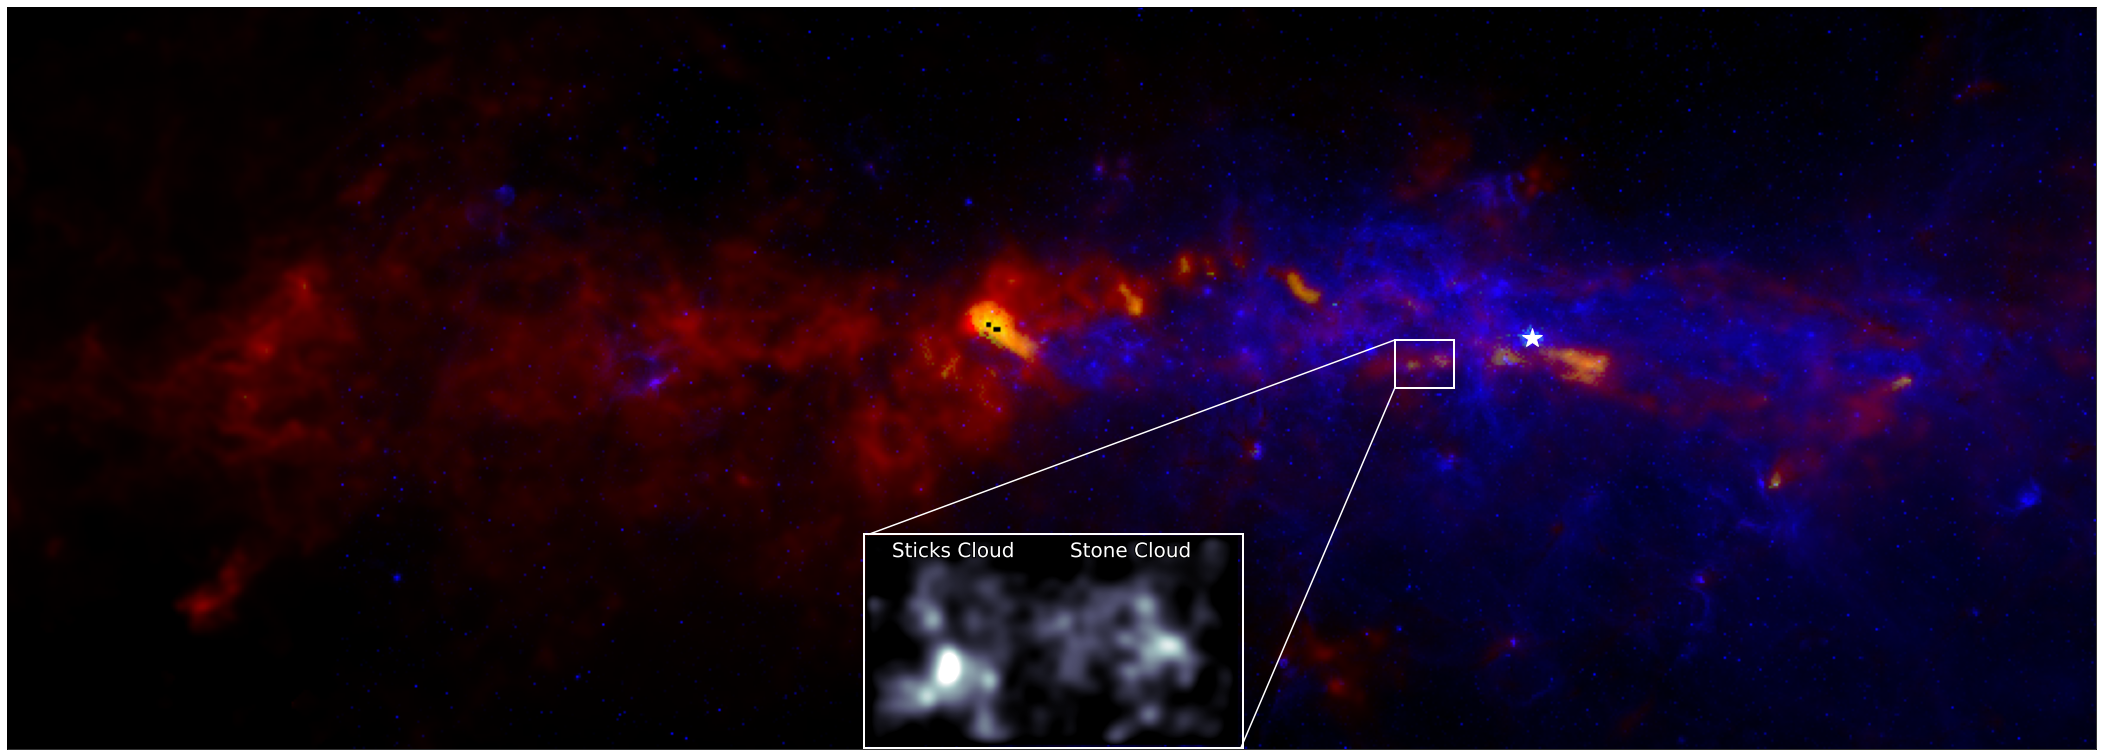

In [10]:

label_size=20
fig1 = plt.figure(figsize=(30,27))
ranges=[170,30]
ax = fig1.add_subplot(111, projection=wcs_cmzoom)
spitz_data= np.nan_to_num(hdu_spitzer_i4.data, nan=0.0)
cmzoom_data= np.nan_to_num(hdu_cmzoom.data, nan=0.0)
#spitz_data= np.nan_to_num(hdu_spitzer_i4.data, nan=0.0)
h2co_data= np.nan_to_num(hdu_h2co.data, nan=0.0)
cmzoom_full_data= np.nan_to_num(hdu_cmzoom_full.data, nan=0.0)
cmzoom_data = np.nan_to_num(hdu_cmzoom.data, nan=0.0, posinf=0.0, neginf=0.0)
g= ImageNormalize(cmzoom_full_data,vmin=7e7,vmax=7e9,stretch=LogStretch(), clip=True)(cmzoom_full_data) # vmax=1.5e22
r = ImageNormalize(hdu_herschel.data,stretch=LogStretch(a=5),vmin=5e20,vmax=5e23, clip=True)(hdu_herschel.data) # vmax=3.03
b = ImageNormalize(spitz_data, stretch=LogStretch(a=5),vmin=60,vmax=1075, clip=True)(spitz_data) # vmax=3.49
lon = ax.coords[0]
lat = ax.coords[1]
ra_min, dec_min = wcs_xrayint.all_pix2world(0, 0, 0)
ra_max, dec_max = wcs_xrayint.all_pix2world(313, 175, 0)

x_min_new, y_min_new = wcs_cmzoom.all_world2pix(ra_min, dec_min, 0)
x_max_new, y_max_new = wcs_cmzoom.all_world2pix(ra_max, dec_max, 0)

rgb_default = make_lupton_rgb(r, g, b,stretch=1,Q=0.5) # minimum=[0.24, 0.08, 0.24]

ax.imshow(rgb_default)
sgra_pos = SkyCoord(frame="galactic", l=359.94423568 , b=-00.04616002, unit=(u.deg)) #found on simbad
sgra_pos_pix = wcs_herschel.world_to_pixel(sgra_pos)
ax.plot(sgra_pos_pix[0],sgra_pos_pix[1] ,'*', c='white', markersize=20)  #plotting sgra* position
axins = zoomed_inset_axes(ax, 0.5, loc=8)# zoom = 6
axins.imshow(hdu_xrayint.data, origin='lower',cmap='bone',vmin=5.9e-9,vmax=3e-8)
# Create a Rectangle patch
rect = patches.Rectangle((x_min_new+250, y_min_new+52), 25, 20, linewidth=2, edgecolor='white', facecolor='none')
rect2 = patches.Rectangle((361, 0), 160, 90, linewidth=2, edgecolor='white', facecolor='none')
# Add the patch to the Axes
axins.text(s='Sticks Cloud',x=0.07,y=.9,color='white',fontsize=label_size,transform=axins.transAxes,path_effects=[pe.withStroke(linewidth=2, foreground="black")])
axins.text(s='Stone Cloud',x=0.55,y=.9,color='white',  fontsize=label_size,transform=axins.transAxes,path_effects=[pe.withStroke(linewidth=2, foreground="black")])
ax.add_patch(rect)
ax.add_patch(rect2)
#mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0")
#axins = zoomed_inset_axes(ax, 4, loc=1, bbox_to_anchor=(0.8, 0.8), bbox_transform=ax.transAxes)
#ax.indicate_inset_zoom(axins, edgecolor="white")
plt.xticks([],visible=False)
plt.yticks([],visible=False)
ax.plot([520,585],[0,152],color='white')  # Start at (0, 0) and end at (1, 1)
ax.plot([363,585],[90,172],color='white')  # Start at (0, 0) and end at (1, 1)
plt.tight_layout(pad=0.1, w_pad=0.1, h_pad=0.1)
lat.set_ticks_visible(False)
lat.set_ticklabel_visible(False)
lat.set_axislabel('')
lon.set_ticks_visible(False)
lon.set_ticklabel_visible(False)
lon.set_axislabel('')
plt.draw()

In [225]:
fig1.savefig('sticks_stone_overview.png',dpi=300)

In [4]:
stone_pos = SkyCoord(frame="galactic", l=.068 , b=-00.076, unit=(u.deg)) #found on simbad
sgra_pos = SkyCoord(frame="galactic", l=359.94423568 , b=-00.04616002, unit=(u.deg)) #found on simbad

In [ ]:
print((360-359.94423568)+.068)

0.12376431999998022


In [5]:
def open_files(file):
    filename = file
    hdu  = fits.open(filename)[0]
    wcs=WCS(hdu.header)
    if hdu.header['NAXIS']==3:
        wcs=wcs.dropaxis(2)
    return hdu, wcs

def fig(file,row,col):
    mpl.rcParams['font.sans-serif'] = "georgia"
    mpl.rcParams['mathtext.fontset'] = "cm" 
    hdu,wcs=file                                            #unpacking file

    fig = plt.figure(figsize=(16, 6))
    for i in range(row * col):
        coord = plt.subplot(row, col, i + 1, projection=wcs, slices=('x', 'y'))
        lon = coord.coords[0]
        lat = coord.coords[1]

        return coord.imshow(hdu.data,norm='log')


def plot_coords_galactic(file, min_coord, max_coord): 
    hdu,wcs=file  
    min_galactic = SkyCoord(frame="galactic", l=min_coord[0] , b=min_coord[1], unit=(u.deg)) #found on simbad
    min_pixel = wcs.world_to_pixel(min_galactic)

    max_galactic = SkyCoord(frame="galactic", l=max_coord[0] , b=max_coord[1], unit=(u.deg)) #found on simbad
    max_pixel = wcs.world_to_pixel(max_galactic)

    return min_pixel,max_pixel


def single_coord(file,coord):
    hdu,wcs=file 
    pos = SkyCoord(frame="galactic", l=coord[0], b=coord[1], unit=(u.deg))
    x, y = wcs.world_to_pixel(pos)
    return (x, y)


In [7]:
def crop(filename, min_coords,max_coords, output_filename):
    file = open_files(filename)
    hdu, wcs = file

    pixel_min= single_coord(file,min_coords)
    pixel_max=single_coord(file,max_coords)
    pixel_width=np.abs(pixel_max[0]-pixel_min[0])
    pixel_length=np.abs(pixel_max[1]-pixel_min[1])
    pixel_center= [pixel_min[0]+(pixel_max[0]-pixel_min[0])/2,pixel_min[1]+(pixel_max[1]-pixel_min[1])/2]

    cutout          = Cutout2D(hdu.data, position=[pixel_center[0], pixel_center[1]],
                    size=(pixel_length,pixel_width), wcs=wcs)
    hdu.data        = cutout.data
    hdu.header.update(cutout.wcs.to_header())
    hdu.writeto(output_filename, overwrite=True)

In [8]:
from astropy.io import fits
from astropy.wcs import WCS
from reproject import reproject_interp

def regridding(old_filename, new_filename, output_filename):
    # Open the old FITS file
    file = open_files(old_filename)
    hdu, wcs = file

    # Open the new FITS file
    new_file = open_files(new_filename)
    new_hdu, new_wcs = new_file

    # Reproject the old data to the new WCS
    rescaled_data, _ = reproject_interp((hdu.data, wcs), new_hdu.header)

    # Create a new HDU for the rescaled data with the new header
    rescaled_imagehdu = fits.PrimaryHDU(data=rescaled_data, header=new_hdu.header)

    # Optional: Verify the WCS from the rescaled image
    rescaled_wcs = WCS(rescaled_imagehdu.header)

    # Save the rescaled HDU to a new FITS file

    rescaled_imagehdu.writeto(output_filename, overwrite=True)


In [37]:
crop(cmzoom_full, (2.0, -.6), (359.185, .4),'cmzoom_full_cropped_no_nans.fits')
crop(spitzer_i4, (2.0, -.6), (359.185, .4),'spitzer_i4_cropped.fits')
crop(herschel, (2.0, -.6), (359.185, .4),'herschel_colden_cropped.fits')

In [38]:
file = open_files("data/CMZoom_continuum_no_pbcor_feathered.fits")
hdu, wcs = file

pixel_min= single_coord(file,(2.5, -1.0))
pixel_max=single_coord(file,(358.185, .5))
pixel_width=np.abs(pixel_max[0]-pixel_min[0])
pixel_length=np.abs(pixel_max[1]-pixel_min[1])
pixel_center= [pixel_min[0]+(pixel_max[0]-pixel_min[0])/2,pixel_min[1]+(pixel_max[1]-pixel_min[1])/2]

cutout          = Cutout2D(hdu.data, position=[pixel_center[0], pixel_center[1]],
                size=(pixel_length,pixel_width), wcs=wcs)
hdu.data        = cutout.data
hdu.header.update(cutout.wcs.to_header())
hdu.writeto('cmzoom_full_cropped_no_nans.fits', overwrite=True)

In [39]:
cmzoom_full_cropped='cmzoom_full_cropped_no_nans.fits'
spitz_cropped='spitzer_i4_cropped.fits'
h_cropped='herschel_colden_cropped.fits'

In [40]:
regridding(cmzoom_full_cropped,h_cropped,'cmzoom_full_cropped_regrid_to_hershel.fits')
regridding(spitz_cropped,h_cropped,'spitz_i4_cropped_regrid_to_hershel.fits')

In [7]:
cmzoom_full=open_files('cmzoom_full_cropped_regrid_to_hershel.fits')
hdu_cmzoom_full,wcs_cmzoom_full=cmzoom_full

spitzer_i4=open_files('spitz_i4_cropped_regrid_to_hershel.fits')
hdu_spitzer_i4,wcs_spitzer_i4=spitzer_i4

herschel=open_files('herschel_colden_cropped.fits')
hdu_herschel,wcs_herschel=herschel

h2co_int=open_files('non_pb_corrected_from_dan_G0.068-0.075.H2CO.218.2GHz_integrated.fits')
hdu_h2co_int,wcs_h2co_int=h2co_int

cmzoom = "cmzoom_cutout.regrid.fits"
hdu_cmzoom      = fits.open(cmzoom)[0]
wcs_cmzoom = WCS(hdu_cmzoom.header)
filename = 'non_pb_corrected_from_dan_G0.068-0.075.H2CO.218.2GHz_integrated.fits'
hdu_h2co  = fits.open(filename)[0]
wcs_h2co=WCS(hdu_h2co.header)

xray = "data/Xray_Clavel_chandra_pigs-cube_smoothed_4k.fits"
hdu_xray      = fits.open(xray)[0]
wcs_xray = WCS(hdu_xray.header)
wcs_xray_2axis=wcs_xray.dropaxis(2)

In [10]:
len_xray = 17
xray_start=11
for i in range(xray_start, len_xray, 1):
    if i == xray_start:
        xray_int = hdu_xray.data[i]
        #print(i)
    else:
        xray_int = xray_int + hdu_xray.data[i]



In [12]:
ppmap=open_files('l000_cdens.fits')
hdu_ppmap,wcs_ppmap=ppmap

6.6000000004223995 6.000000000384


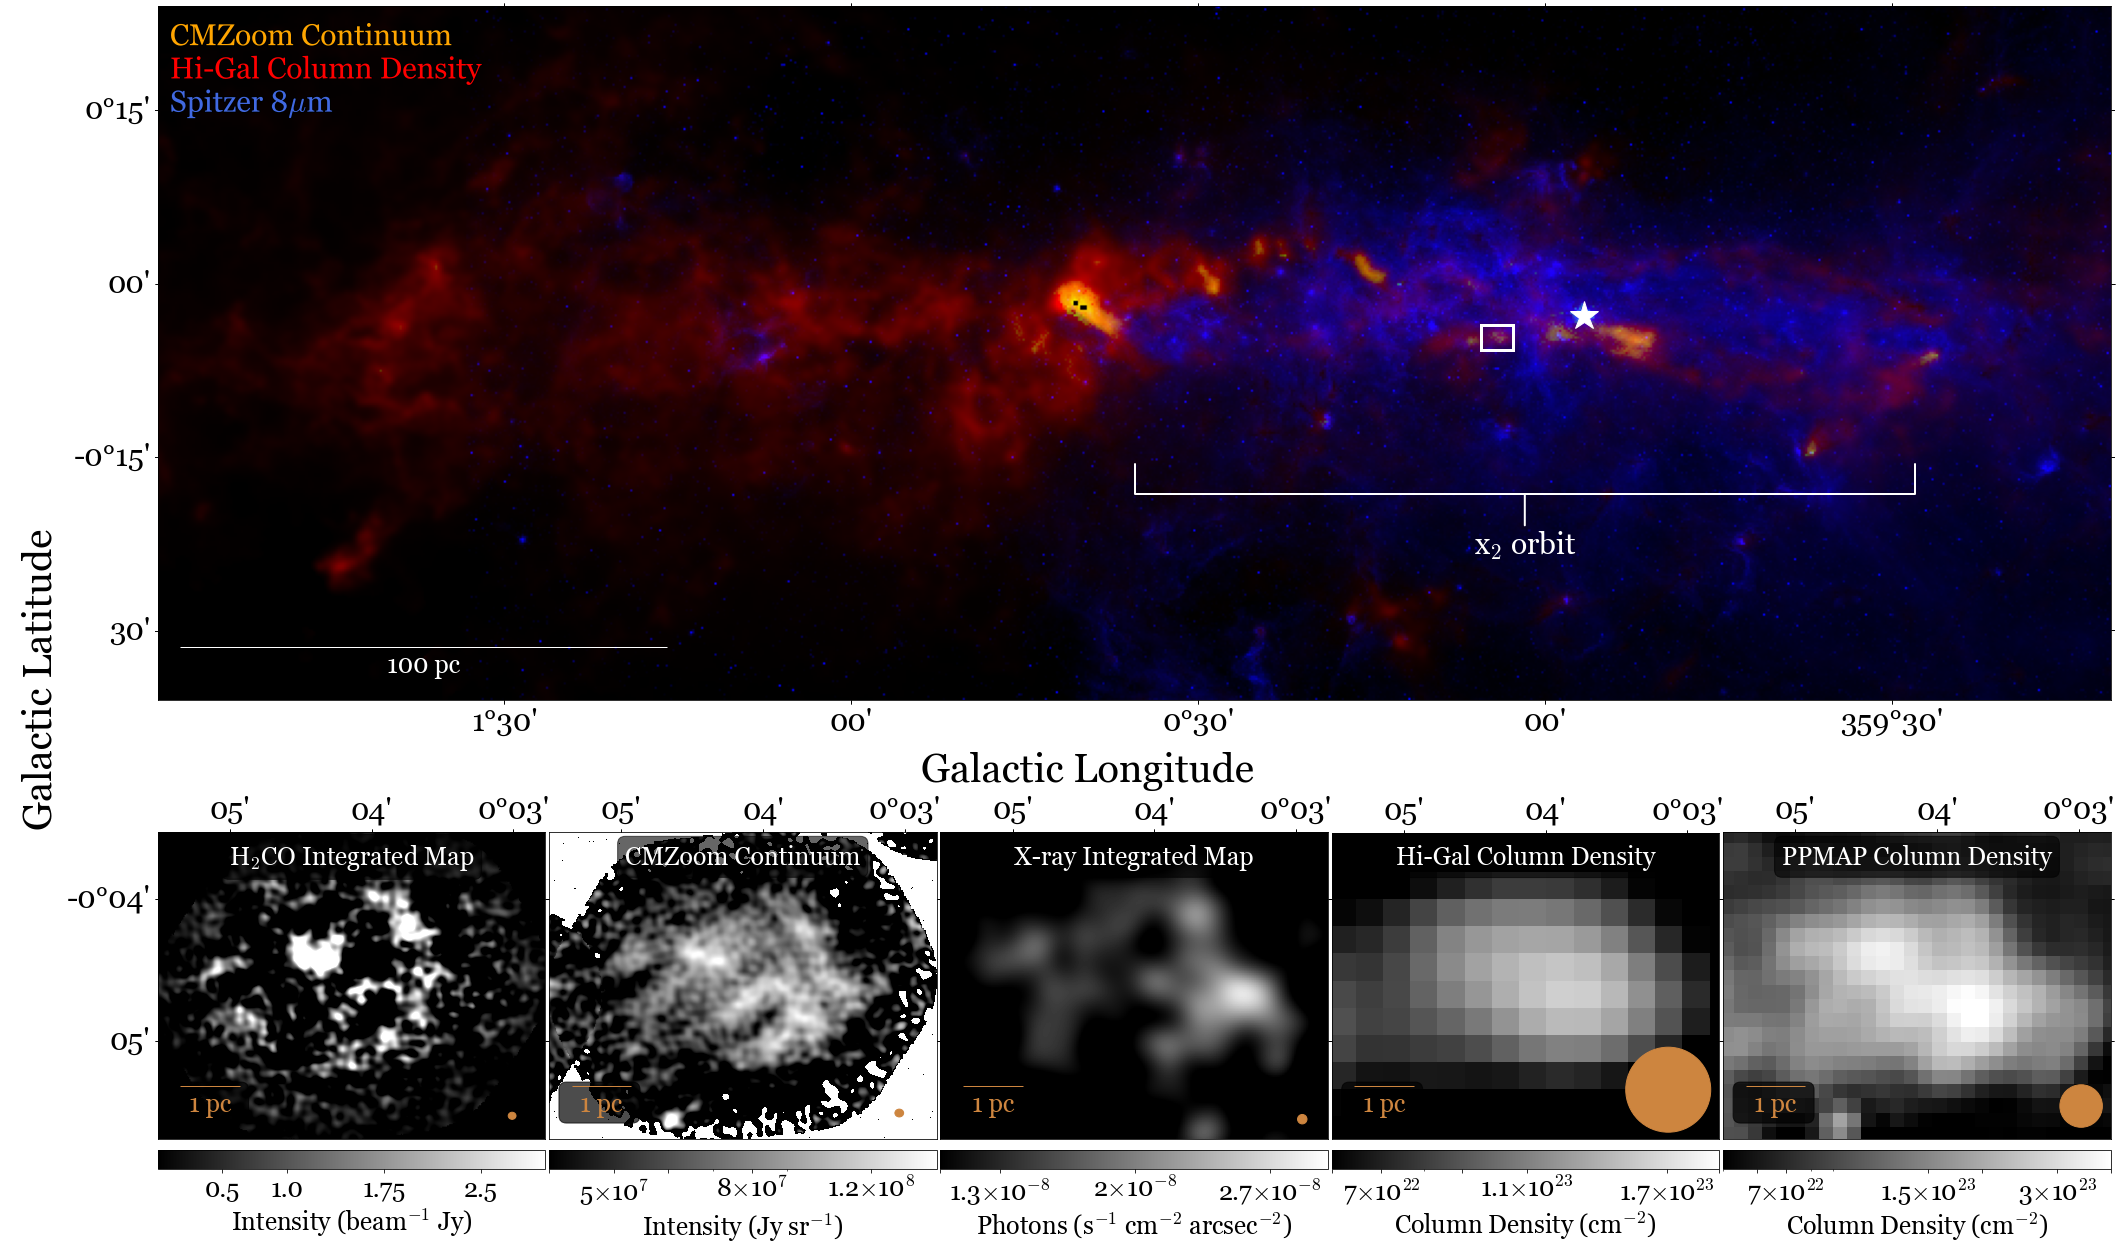

In [53]:
#fig1 = plt.figure(figsize=(30,27))
#gs = fig1.add_gridspec(2, 4,wspace=0.01, hspace=-0.35) #original layout
fig1 = plt.figure(figsize=(35,25))
gs = fig1.add_gridspec(2, 5,wspace=0.01, hspace=-.7) 
spitz_data= np.nan_to_num(hdu_spitzer_i4.data, nan=0.0)
cmzoom_data= np.nan_to_num(hdu_cmzoom.data, nan=0.0)
#spitz_data= np.nan_to_num(hdu_spitzer_i4.data, nan=0.0)
h2co_data= np.nan_to_num(hdu_h2co.data, nan=0.0)
cmzoom_full_data= np.nan_to_num(hdu_cmzoom_full.data, nan=0.0)
cmzoom_data = np.nan_to_num(hdu_cmzoom.data, nan=0.0, posinf=0.0, neginf=0.0)
g= ImageNormalize(cmzoom_full_data,vmin=7e7,vmax=7e9,stretch=LogStretch(), clip=True)(cmzoom_full_data) # vmax=1.5e22
r = ImageNormalize(hdu_herschel.data,stretch=LogStretch(a=5),vmin=5e20,vmax=5e23, clip=True)(hdu_herschel.data) # vmax=3.03
b = ImageNormalize(spitz_data, stretch=LogStretch(a=5),vmin=60,vmax=1075, clip=True)(spitz_data) # vmax=3.49

rgb_default = make_lupton_rgb(r, g, b,stretch=1,Q=0.7) # minimum=[0.24, 0.08, 0.24]
gc_distance = 8.17 * u.kpc
scalebar_length_1 = 1 * u.pc
scalebar_length_100 = 100 * u.pc
scalebar_length_4arcsec = 4 * u.arcsec
scalebar_length_36arcsec=36 * u.arcsec
arcsec_to_pc=0.039 *u.pc/u.arcsec 
scalebar_length_3arcsec = 3 * u.arcsec
scalebar_angle_1pc = (scalebar_length_1 / gc_distance).to(u.deg, equivalencies=u.dimensionless_angles())
scalebar_angle_100pc = (scalebar_length_100 / gc_distance).to(u.deg, equivalencies=u.dimensionless_angles())
scalebar_angle_4arcsec = ((scalebar_length_4arcsec*arcsec_to_pc) / gc_distance).to(u.deg, equivalencies=u.dimensionless_angles())
scalebar_angle_3arcsec = ((scalebar_length_3arcsec*arcsec_to_pc) / gc_distance).to(u.deg, equivalencies=u.dimensionless_angles())
scalebar_angle_36arcsec = ((scalebar_length_36arcsec*arcsec_to_pc) / gc_distance).to(u.deg, equivalencies=u.dimensionless_angles())
beam_color='peru'
wcs_xray_2axis=wcs_xray.dropaxis(2)
hdus=[rgb_default, h2co_data,cmzoom_data,xray_int,hdu_herschel.data,hdu_ppmap.data]
projections=[wcs_herschel,wcs_h2co_int,wcs_cmzoom,wcs_xray_2axis,wcs_herschel,wcs_ppmap]

x_min=0
x_max=328
y_min=0
y_max=260
titles=['RGB: Spitzer 8 (blue), CMZoom continuum(red), Hi-Gal Column density (green)',r'H$_2$CO Integrated Map','CMZoom Continuum','X-ray Integrated Map','Hi-Gal Column Density','PPMAP Column Density']

colorbar_title=[r'Intensity (beam$^{-1}$ Jy)',r'Intensity (Jy sr$^{-1}$)','Photons'+ r" (s$^{-1}$ cm$^{-2}$" + r" arcsec$^{-2}$)",r'Column Density (cm$^{-2}$)',r'Column Density (cm$^{-2}$)']
ax = np.zeros(9, dtype=object)
ax[0] = fig1.add_subplot(gs[0, :],projection=projections[0])
ax[1] = fig1.add_subplot(gs[-1, 0],projection=projections[1])
ax[2] = fig1.add_subplot(gs[-1, 1],projection=projections[2])
ax[3] = fig1.add_subplot(gs[-1, 2],projection=projections[3])
ax[4] = fig1.add_subplot(gs[-1, -2],projection=projections[4])
ax[5] = fig1.add_subplot(gs[-1, -1],projection=projections[5])
matplotlib.rcParams['mathtext.fontset'] = "cm" 
matplotlib.rcParams['font.sans-serif'] = "georgia" 
label_size=25
fs=15
colormap = plt.cm.get_cmap('magma')
reversed_map = colormap.reversed()
normalize = matplotlib.colors.Normalize(vmin=1e20,vmax=2e23)

# Convert pixel coordinates to world coordinates for column 2
ra_min, dec_min = wcs_h2co_int.all_pix2world(x_min, y_min, 0)
ra_max, dec_max = wcs_h2co_int.all_pix2world(x_max, y_max, 0)
for i in range(len(hdus)):
    min_coord = SkyCoord(frame="galactic", l=-2.23568 , b=-0.7616002, unit=(u.deg)) #found on simbad
    min_coord = projections[i].world_to_pixel(min_coord)

    max_coord = SkyCoord(frame="galactic", l=2.53568 , b=-1.4616002, unit=(u.deg)) #found on simbad
    max_coord = projections[i].world_to_pixel(max_coord)

    x_min_new, y_min_new = projections[i].all_world2pix(ra_min, dec_min, 0)
    x_max_new, y_max_new = projections[i].all_world2pix(ra_max, dec_max, 0)

    sgra_pos = SkyCoord(frame="galactic", l=359.94423568 , b=-00.04616002, unit=(u.deg)) #found on simbad
    sgra_pos_pix = projections[i].world_to_pixel(sgra_pos)
    x1, x2, y1, y2 = x_min_new,x_max_new,y_min_new,y_max_new


    if i==0:
        ax[i].imshow(hdus[i].data, origin='lower') 
        lon = ax[i].coords[0]
        lat = ax[i].coords[1]
        ax[i].plot(sgra_pos_pix[0],sgra_pos_pix[1] ,'*', c='white', markersize=30)  #plotting sgra* position
        x_min, y_min = projections[i].all_world2pix(ra_min, dec_min, 0)
        x_max, y_max = projections[i].all_world2pix(ra_max, dec_max, 0)

        # Create a rectangle using these pixel coordinates
        rect = mpatches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min,
                                linewidth=3, edgecolor='white', facecolor='none')


        # Add the rectangle to the first plot (ax[0])
        ax[i].add_patch(rect)
        ax[i].text(s=r'Spitzer 8$\mu$m',x=5,y=265,color='royalblue',path_effects=[pe.withStroke(linewidth=2, foreground="black")],fontsize=30)
        ax[i].text(s='Hi-Gal Column Density',x=5,y=280,color='red',path_effects=[pe.withStroke(linewidth=2, foreground="black")],fontsize=30)
        ax[i].text(s='CMZoom Continuum',x=5,y=295,color='orange',path_effects=[pe.withStroke(linewidth=2, foreground="black")],fontsize=30)
        lon.set_ticklabel(size=30)
        lat.set_ticklabel(size=30)
        ax[i].set_ylabel(' ', fontsize=40)
        ax[i].set_xlabel(' ', fontsize=40)
        #ax[i].set_ylabel('Galactic Latitude', fontsize=40)
        ax[i].annotate('x$_2$ orbit', xy=(0.70, 0.30), xytext=(0.70, .20), xycoords='axes fraction', 
            fontsize=fs*2, ha='center', va='bottom',color='white',
            arrowprops=dict(arrowstyle='-[, widthB=13.0, lengthB=1.', lw=2.0, color='white'))
        plt.rcParams['font.size'] = 25
        add_scalebar(ax[i], scalebar_angle_100pc, label='100 pc',color='white',corner='bottom left')

    else:
        ax[i].xaxis.set_label_position('top')  # Move x-axis label to top
        ax[i].xaxis.set_ticks_position('top')  # Move x-axis ticks to top
        #ax[i].coords['ra'].set_axislabel_position('top')  # Move x-axis label to top
        ax[i].tick_params(axis='x', which='both', top=True, labeltop=True, bottom=False, labelbottom=False)
        if i==1:
            img=ax[i].imshow(hdus[i],cmap='gray',vmin=0,vmax=3)
            lon = ax[i].coords[0]
            lat = ax[i].coords[1]
            ax[i].text(0.500, 0.92, str(titles[i]), ha='center', va='center', transform=ax[i].transAxes,
                bbox=dict(boxstyle='round', facecolor='black', edgecolor='k', alpha=0.6),color='white', fontsize=label_size)
            lon.set_ticklabel(size=30)
            lat.set_ticklabel(size=30)
            ax[i].set_xlabel('Galactic Longitude ', fontsize=40)
            ax[i].set_ylabel('Galactic Latitude', fontsize=40)
        elif i==2:
            img=ax[i].imshow(hdus[i],norm=LogNorm(vmin=4e7,vmax=1.5e8),cmap='gray')
            lon = ax[i].coords[0]
            lat = ax[i].coords[1]
            ax[i].text(0.5, 0.92, str(titles[i]), ha='center', va='center', transform=ax[i].transAxes,
                bbox=dict(boxstyle='round', facecolor='k', edgecolor='k', alpha=0.6),color='white', fontsize=label_size)
            lon.set_ticklabel(size=30)
            ax[i].set_xlabel('Galactic Longitude', fontsize=40)
            ax[i].tick_params(axis='y', labelleft=False)
        elif i==3:
            img=ax[i].imshow(hdus[i],cmap='gray',vmin=9.9e-9,vmax=3e-8)
            lon = ax[i].coords[0]
            lat = ax[i].coords[1]
            ax[i].text(0.5, 0.92, str(titles[i]), ha='center', va='center', transform=ax[i].transAxes,
                bbox=dict(boxstyle='round', facecolor='k', edgecolor='k', alpha=0.6), color='white',fontsize=label_size)
            lon.set_ticklabel(size=30)
            ax[i].set_xlabel('Galactic Longitude', fontsize=40)
            ax[i].tick_params(axis='y', labelleft=False)
        elif i==4:
            img=ax[i].imshow(hdus[i], norm='log', vmin=6e22,vmax=2e23,cmap='gray') #for herschel
            lon = ax[i].coords[0]
            lat = ax[i].coords[1]
            lon.set_ticklabel(size=30)
            ax[i].set_xlabel('Galactic Longitude', fontsize=40)
            ax[i].text(0.5, 0.92, str(titles[i]), ha='center', va='center', transform=ax[i].transAxes,
                bbox=dict(boxstyle='round', facecolor='k', edgecolor='k', alpha=0.6), color='white',fontsize=label_size)
            ax[i].tick_params(axis='y', labelleft=False)
        else:
            img=ax[i].imshow(hdus[i], norm='log', vmin=500,vmax=4000, cmap='gray') #for herschel
            lon = ax[i].coords[0]
            lat = ax[i].coords[1]
            lon.set_ticklabel(size=30)
            ax[i].set_xlabel('Galactic Longitude', fontsize=40)
            ax[i].text(0.5, 0.92, str(titles[i]), ha='center', va='center', transform=ax[i].transAxes,
                bbox=dict(boxstyle='round', facecolor='k', edgecolor='k', alpha=0.6),color='white', fontsize=label_size)
            ax[i].tick_params(axis='y', labelleft=False)
        x_min_new, y_min_new =projections[i].all_world2pix(ra_min, dec_min, 0)
        x_max_new, y_max_new = projections[i].all_world2pix(ra_max, dec_max, 0)
        
        cbar = fig1.colorbar(img, ax=ax[i], orientation='horizontal', fraction=0.038, pad=0.01)
        cbar.set_label(colorbar_title[i-1],fontsize=25)
        cbar.ax.tick_params(labelsize=25)
        if i==1:
            ticks = [0.5,1.0,1.75,2.5]
            tick_labels = ['0.5','1.0', '1.75', '2.5']  
            cbar.set_ticks(ticks)
            cbar.ax.set_xticklabels(tick_labels)

            # Given values for beam size in arcseconds
            beam_major = 3.3  # Beam major axis in arcseconds
            beam_minor = 3.0  # Beam minor axis in arcseconds
            pixel_scale = 0.00013888888888  # Pixel scale in arcseconds per pixel

            # Convert beam size from arcseconds to pixels
            beam_major_pixels = beam_major / (pixel_scale*3600)
            beam_minor_pixels = beam_minor / (pixel_scale*3600)
            print(beam_major_pixels,beam_minor_pixels)

            # Add an ellipse to represent the beam size
            beam = patches.Ellipse(
                (300,20),  # Position of the beam (centered at (50, 50) pixels)
                width=beam_major_pixels,  # Beam major axis in pixels
                height=beam_minor_pixels,  # Beam minor axis in pixels
                edgecolor=beam_color,
                facecolor=beam_color,
                hatch='//',
                lw=1
            )
        
            ax[i].add_patch(beam)
            #add_scalebar(ax[i], scalebar_angle_3arcsec, label='3 arcsec',color='pink',corner='bottom right')
        if i==2:
            ticks = [4e7,5e7,6e7,8e7,1.2e8]
            tick_labels = ['',r'5$\times$10$^7$',"", r'8$\times$10$^7$',r'1.2$\times$10$^8$']  
            cbar.set_ticks(ticks)
            cbar.ax.set_xticklabels(tick_labels)
            # Given values for beam size in arcseconds
            beam_major = 3.7  # Beam major axis in arcseconds
            beam_minor = 3.3  # Beam minor axis in arcseconds
            pixel_scale = 0.00013888888888  # Pixel scale in arcseconds per pixel

            # Convert beam size from arcseconds to pixels
            beam_major_pixels = beam_major / (pixel_scale*3600)
            beam_minor_pixels = beam_minor / (pixel_scale*3600)

            # Add an ellipse to represent the beam size
            beam = patches.Ellipse(
                (885,165),  # Position of the beam (centered at (50, 50) pixels)
                width=beam_major_pixels,  # Beam major axis in pixels
                height=beam_minor_pixels,  # Beam minor axis in pixels
                edgecolor=beam_color,
                facecolor=beam_color,
                hatch='//',
                lw=1
            )

            ax[i].add_patch(beam)
            plt.gca().set_aspect('equal', adjustable='box')
        if i==3:
            ticks = [9.9e-9,1.3e-8,2e-8,2.7e-8]
            tick_labels = ['',r'1.3$\times$10$^{-8}$',r'2$\times$10$^{-8}$',r'2.7$\times$10$^{-8}$']  
            cbar.set_ticks(ticks)
            cbar.ax.set_xticklabels(tick_labels)

            beam_major =4 #beam size=smoothing kernel
            beam_minor = 4 # Beam size=smoothing kernel
            pixel_scale= .00027777777777778 
            # Convert beam size from arcseconds to pixels
            beam_major_pixels = beam_major / (pixel_scale*3600)
            beam_minor_pixels = beam_minor / (pixel_scale*3600)

            # Add an ellipse to represent the beam size
            beam = patches.Ellipse(
                (280,30),  # Position of the beam (centered at (50, 50) pixels)
                width=beam_major_pixels,  # Beam major axis in pixels
                height=beam_minor_pixels,  # Beam minor axis in pixels
                edgecolor=beam_color,
                facecolor=beam_color,
                hatch='//',
                lw=1
            )

            ax[i].add_patch(beam)
            plt.gca().set_aspect('equal', adjustable='box')
            #add_scalebar(ax[i], scalebar_angle_4arcsec, label='.5 arcsec',color='pink',corner='bottom right')
        if i==4:
            ticks_4 = [6e22,7e22,9e22,1.1e23,1.7e23,2e23]
            tick_labels_4 = ["",r'7$\times$10$^{22}$', r' ', r'1.1$\times$10$^{23}$',r'1.7$\times$10$^{23}$','']  
            cbar.set_ticks(ticks_4)
            cbar.ax.set_xticklabels(tick_labels_4)

            beam_major = 36  # Beam major axis in arcseconds
            beam_minor = 36  # Beam minor axis in arcseconds
            pixel_scale= 0.00319744203175
            # Convert beam size from arcseconds to pixels
            beam_major_pixels = beam_major / (pixel_scale*3600)
            beam_minor_pixels = beam_minor / (pixel_scale*3600)

            # Add an ellipse to represent the beam size
            beam = patches.Ellipse(
                (609,159.5),  # Position of the beam (centered at (50, 50) pixels)
                width=beam_major_pixels,  # Beam major axis in pixels
                height=beam_minor_pixels,  # Beam minor axis in pixels
                edgecolor=beam_color,
                facecolor=beam_color,
                hatch='//',
                lw=1
            )

            ax[i].add_patch(beam)
            plt.gca().set_aspect('equal', adjustable='box')
            #add_scalebar(ax[i], scalebar_angle_36arcsec, label='.5 arcsec',color='pink',corner='bottom right')

        if i==5:
            ticks_5 = [600,700,1500,2000,3000,4000]
            tick_labels_5 = [' ',r'7$\times$10$^{22}$',r'1.5$\times$10$^{23}$', ' ', r'3$\times$10$^{23}$',' ']  
            cbar.set_ticks(ticks_5)
            cbar.ax.set_xticklabels(tick_labels_5)

            beam_major = 12  # Beam major axis in arcseconds
            beam_minor = 12  # Beam minor axis in arcseconds
            pixel_scale= 0.001667 
            # Convert beam size from arcseconds to pixels
            beam_major_pixels = beam_major / (pixel_scale*3600)
            beam_minor_pixels = beam_minor / (pixel_scale*3600)

            # Add an ellipse to represent the beam size
            beam = patches.Ellipse(
                (678,641),  # Position of the beam (centered at (50, 50) pixels)
                width=beam_major_pixels,  # Beam major axis in pixels
                height=beam_minor_pixels,  # Beam minor axis in pixels
                edgecolor=beam_color,
                facecolor=beam_color,
                hatch='//',
                lw=1
            )

            ax[i].add_patch(beam)
            plt.gca().set_aspect('equal', adjustable='box')

        lat.set_major_formatter('dd:mm')
        lon.set_major_formatter('dd:mm')
        ax[i].set_xlim(x_min_new, x_max_new)
        ax[i].set_ylim(y_min_new, y_max_new)
        ax[i].set_xlabel(' ', fontsize=40)
        ax[i].set_ylabel(' ', fontsize=40)
        ax[i].text(0.13, 0.12, '           ', ha='center', va='center', transform=ax[i].transAxes,
                bbox=dict(boxstyle='round', facecolor='k', edgecolor='k', alpha=0.7), fontsize=label_size)
        add_scalebar(ax[i], scalebar_angle_1pc, label='1 pc',color=beam_color,corner='bottom left')

#ax[1].text(1.9, -.3 ,'Galactic Longitude', ha='center', va='center', transform=ax[1].transAxes, fontsize=40)
ax[1].text(2.4, 1.2 ,'Galactic Longitude', ha='center', va='center', transform=ax[1].transAxes, fontsize=40)
ax[1].text(-0.3, 1.5 ,'Galactic Latitude', ha='center', va='center', rotation=90,transform=ax[1].transAxes, fontsize=40)
plt.show()


In [54]:
fig1.savefig("fig1_stone_mc_updated_ppmap.pdf", dpi=300, bbox_inches="tight")